# Simple Improved Reference Subtraction (SIRS)<br> Compute $\alpha$ and $\beta$ for JWST NIRISS and SIRS Correct Files

Bernard J. Rauscher<br>
NASA Goddard Space Flight Center

This example shows how to compute the frequency dependent weight vectors for JWST NIRISS. We use the resulting SIRS calibration file to SIRS correct an independent set of files.

In [1]:
# Standard Julia packages
using Revise
using Glob
using FITSIO

# The SIRS package
using SIRS

The NIRISS filenames do not sort nicely. Write a little utility function to sort lists of files by the integration timestamp.

In [2]:
"""
    sort_fits(files)

Sort a list of NIRISS files by integration start time

    Parameters: files::Vector{String}
                  A list of filenames
"""
function sort_fits(files)
   
    # Get timestamps for all files
    ts = ["",]
    for file in files
        f = FITS(file, "r")
        push!(ts, read_header(f[1])["DATE-OBS"]*"T"*read_header(f[1])["TIME-OBS"]) 
    end
    ts = ts[2:end]
    
    # Indirect sort
    return(files[sortperm(ts)])
end;

Use the files recommended by Chris Willott. Treat the first 24 as the training data. SIRS correct the last 24.

In [3]:
files = sort_fits(glob("*.fits", "/local/data/racy1/brausche/JWST/NIRISS/SIRS_Darks_Willott"));

In [4]:
naxis3 = 100; # Number of up-the-ramp frames from one of the FITS headers

In [30]:
# For debugging, it can be helpful to read a previously computed SIRSCore back in
# sc1 = restore(ENV["HOME"]*"/Library/JWST/NIRISS/"*"20160105_niriss_sirs_first-24.jld")

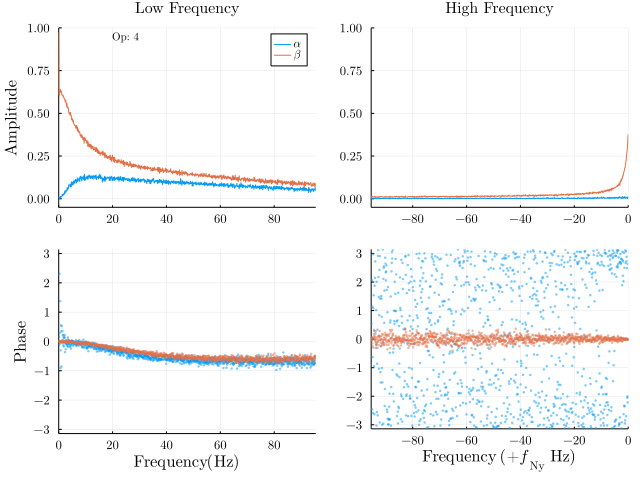

In [32]:
wplot(sc, 4, nice=false)

In [ ]:
f = FITS(files[25], "r")
D = Float64.(read(f[1]))
D2 = copy(D)
close(f);

In [ ]:
sirssub!(sc, D)
sirssub!(sc, D2, rowsonly=true)

In [ ]:
Λ = LegendreMatrices((naxis3,2));

In [ ]:
f = FITS(ENV["HOME"]*"/tmp/sirs.fits", "w")
write(f, legfit(Λ, D)[:,:,2])
close(f)

In [ ]:
f = FITS(ENV["HOME"]*"/tmp/rows.fits", "w")
write(f, legfit(Λ, D2)[:,:,2])
close(f)